## Seattle AirBnb Analysis

Let's go way north of Austin, right upto Seattle for our data science programming project. But we still love Austin more. It's just that we could scruitinze Seattle better. So, we're picking up this open dataset from kaggle. As we go through our analysis, we would be focusing on Project Context, Data Overview, the legendary EDA for answering some intriguing questions, and finally doing a quick modelling step before concluding. Stay tuned, Y'all. 

In [1]:
%%html
<style type='text/css'>
.CodeMirror{
font-size: 12px;
</style>

In [2]:
# loading the required libraries

import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Data Overview

Looking at the csv file to understand the data and thinking of questions that the data can answer. 

In [3]:
# reading the data 

df = pd.read_csv('listings.csv')
df.shape

(3818, 92)

In [4]:
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
5,5956968,https://www.airbnb.com/rooms/5956968,20160104002432,2016-01-04,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,If you include a bit of your background in you...,We're renting out a small private unit of one ...,none,This part of Queen Anne has wonderful views an...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,2.45
6,1909058,https://www.airbnb.com/rooms/1909058,20160104002432,2016-01-04,Queen Anne Private Bed and Bath,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,Enjoy a quiet stay in our comfortable 1915 Cra...,none,"Close restaurants, coffee shops and grocery st...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.46
7,856550,https://www.airbnb.com/rooms/856550,20160104002432,2016-01-04,Tiny Garden cabin on Queen Anne,"Our tiny cabin is private , very quiet and com...","This cabin was built with Airbnb in mind, Que...","Our tiny cabin is private , very quiet and com...",none,We are centrally located between Downtown and ...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,5,4.73
8,4948745,https://www.airbnb.com/rooms/4948745,20160104002432,2016-01-04,Urban Charm || Downtown || Views,"Nestled in the heart of the city, this space i...","Located in the heart of the city, this space i...","Nestled in the heart of the city, this space i...",none,Walking Score: 92 4 blocks from Kerry Park Fam...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.22
9,2493658,https://www.airbnb.com/rooms/2493658,20160104002432,2016-01-04,Airy + Bright Queen Anne Apartment,"Beautiful apartment in an extremely safe, quie...",What's special about this place? A beautiful r...,"Beautiful apartment in an extremely safe, quie...",none,"Queen Anne is a wonderful, truly functional vi...",...,9.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.55


Clearly the data is has a large feature space. So, we need to look through the columns and see which one's are just variations of each other or the one's which are not relevant to our analysis. 

Further, looking at the data points available, we are interested to look through the following questions: 

    1. What are the top 10 neighborhoods in Seattle with most number of hosts and super hosts?
    2. What are top 10 neighborhoods with highest and lowest avg. listing price?
    3. What is the % breakdown of property types in Seattle in the listings database?
    4. What % of listings are for entire place compared to private or share rooms in listings database?
    5. Are the number of hosts increasing every year in Seattle?
    
So, here onwards we pick out the columns relevant to our analysis, and convert the variables to required datatype (for example, dollar value are stored as string but for analysis we need them as integers). Also, we will be removing the null values.

This is just a starting step, as we explore the data more, we expect to discover more redundant features which we will keep dropping on the way. Or, discover some questions and patterns that seem interesting. 

P.S. Since the data was too huge to see it clearly in pandas dataframe, we looked at the original csv to understand what values are taken by different column names. 

In [5]:
# looking at data types

df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [6]:
# loading column names

df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## Data Cleaning

In [7]:
# dropping the columns not relevant to EDA

df = df.drop(columns =["id", "listing_url", "scrape_id", "last_scraped", "name", "summary", "space", "description", 
                             "neighborhood_overview", "notes", "transit", "host_about", "thumbnail_url", 
                                   "medium_url", "picture_url", "xl_picture_url", "host_url", 
                                           "host_thumbnail_url", "host_picture_url"], axis=1)

df.shape

(3818, 73)

In [8]:
# separating out the categorical vs numerical variables

df_num = df.columns[df.dtypes != 'object']
df_cat = df.columns[df.dtypes == 'object']

print(df_num, df_cat)

Index(['host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object') Index(['experiences_offered', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighb

In [9]:
# checking missing values 

df[df_num].isnull().sum()

host_id                              0
host_listings_count                  2
host_total_listings_count            2
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
square_feet                       3721
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               647
review_scores_accuracy             658
review_scores_cleanliness          653
review_scores_checkin              658
review_scores_communication        651
review_scores_location             655
review_scores_value                656
license                  

In [10]:
df[df_cat].isnull().sum()

experiences_offered                    0
host_name                              2
host_since                             2
host_location                          8
host_response_time                   523
host_response_rate                   523
host_acceptance_rate                 773
host_is_superhost                      2
host_neighbourhood                   300
host_verifications                     0
host_has_profile_pic                   2
host_identity_verified                 2
street                                 0
neighbourhood                        416
neighbourhood_cleansed                 0
neighbourhood_group_cleansed           0
city                                   0
state                                  0
zipcode                                7
market                                 0
smart_location                         0
country_code                           0
country                                0
is_location_exact                      0
property_type   

In [11]:
# dropping the columns with huge null value %age

df = df.drop(columns =["license", "square_feet", "monthly_price", "security_deposit", "weekly_price"],
             axis=1)
df.shape

(3818, 68)

In [12]:
# converting $ value to numeric values 

dollar = ["price", "cleaning_fee", "extra_people"]

for elem in dollar:
    df[elem] = df[elem].str.replace(',', '').str.replace('$', '').astype(float)

In [13]:
# converting %ages to numeric values 

percent = ["host_response_rate", "host_acceptance_rate"]

for elem in percent:
    df[elem] = df[elem].str.replace('%', '').astype(float)

In [14]:
df_num = df.columns[df.dtypes != 'object']
df_cat = df.columns[df.dtypes == 'object']

print(df_num, df_cat)

Index(['host_id', 'host_response_rate', 'host_acceptance_rate',
       'host_listings_count', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object') Index(['experiences_offered', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_is_superhost', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',

In [15]:
# converting date columns to datetime format 

date = ["host_since", "calendar_last_scraped", "first_review", "last_review"]

for elem in date:
    df[elem] = df[elem].apply(pd.to_datetime)

In [16]:
# dropping the rows with no host name

df = df.dropna(subset = ['host_name'], how = 'any', axis=0)
df.shape

(3816, 68)

In [17]:
# finding out the since when the host has been the host

df['delta_year_host'] = pd.DatetimeIndex(df['host_since']).year.astype(int)
df['delta_month_host'] = pd.DatetimeIndex(df['host_since']).month.astype(int)
df['delta_ym_host'] = pd.to_datetime(df['host_since']).dt.to_period('M')

In [18]:
# convert zip to numeric

df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')
df = df.dropna(subset = ['zipcode'], how = 'any', axis = 0)
df['zipcode'] = df['zipcode'].astype(int) 

In [19]:
type(df['zipcode'][0])

numpy.int64

In [20]:
df[df_num].isnull().sum()

host_id                              0
host_response_rate                 519
host_acceptance_rate               768
host_listings_count                  0
host_total_listings_count            0
latitude                             0
longitude                            0
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
price                                0
cleaning_fee                      1025
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               644
review_scores_accuracy             655
review_scores_cleanliness          650
review_scores_checkin    

In [21]:
df[df_cat].isnull().sum()

experiences_offered                   0
host_name                             0
host_since                            0
host_location                         6
host_response_time                  519
host_is_superhost                     0
host_neighbourhood                  295
host_verifications                    0
host_has_profile_pic                  0
host_identity_verified                0
street                                0
neighbourhood                       412
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
city                                  0
state                                 0
zipcode                               0
market                                0
smart_location                        0
country_code                          0
country                               0
is_location_exact                     0
property_type                         1
room_type                             0
bed_type                              0


In [22]:
# filling missing values with mean 

fill = lambda elem: elem.fillna(elem.mean())
df[df_num] = df[df_num].apply(fill)

In [23]:
# filling missing values for categorical variables with string

df[df_cat] = df[df_cat].fillna('Missing')

In [24]:
df.head(10)

,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,delta_year_host,delta_month_host,delta_ym_host
0,none,956883,Maija,2011-08-11,"Seattle, Washington, United States",within a few hours,96.000000,100.000000,f,Queen Anne,...,WASHINGTON,f,moderate,f,f,2,4.070000,2011,8,2011-08
1,none,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98.000000,100.000000,t,Queen Anne,...,WASHINGTON,f,strict,t,t,6,1.480000,2013,2,2013-02
2,none,16708587,Jill,2014-06-12,"Seattle, Washington, United States",within a few hours,67.000000,100.000000,f,Queen Anne,...,WASHINGTON,f,strict,f,f,2,1.150000,2014,6,2014-06
3,none,9851441,Emily,2013-11-06,"Seattle, Washington, United States",Missing,94.890544,99.967105,f,Queen Anne,...,WASHINGTON,f,flexible,f,f,1,2.078323,2013,11,2013-11
4,none,1452570,Emily,2011-11-29,"Seattle, Washington, United States",within an hour,100.000000,99.967105,f,Queen Anne,...,WASHINGTON,f,strict,f,f,1,0.890000,2011,11,2011-11
5,none,326758,Andrew,2010-12-25,"Seattle, Washington, United States",Missing,94.890544,99.967105,f,Queen Anne,...,WASHINGTON,f,strict,f,f,1,2.450000,2010,12,2010-12
6,none,2497928,Gary And Beth,2012-05-30,"Seattle, Washington, United States",within an hour,100.000000,100.000000,t,Queen Anne,...,WASHINGTON,f,moderate,f,f,1,2.460000,2012,5,2012-05
7,none,4016632,Jean-Marc,2012-10-30,"Seattle, Washington, United States",within an hour,100.000000,100.000000,t,Queen Anne,...,WASHINGTON,f,strict,t,t,5,4.730000,2012,10,2012-10
8,none,2166277,Aliza,2012-04-18,"Seattle, Washington, United States",Missing,94.890544,100.000000,f,Queen Anne,...,WASHINGTON,f,strict,f,f,1,1.220000,2012,4,2012-04
9,none,5177328,Andrea,2013-02-21,"Seattle, Washington, United States",within an hour,98.000000,100.000000,t,Queen Anne,...,WASHINGTON,f,strict,t,t,6,1.550000,2013,2,2013-02


In [25]:
df = df.drop(columns =['experiences_offered', 'jurisdiction_names'], axis=1)

## Exploratory Data Analysis

#### Question 1: What are the top 10 neighborhoods in Seattle with most number of hosts and super hosts?

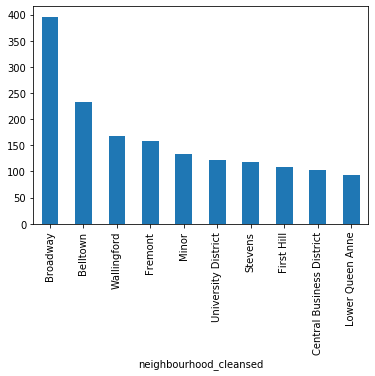

In [26]:
host = df.groupby('neighbourhood_cleansed')['host_id'].count().sort_values(ascending=False)[:10].plot(kind = 'bar')

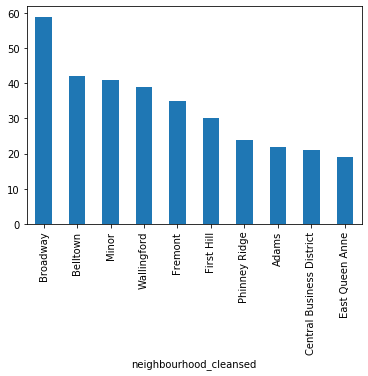

In [27]:
superHost = df[df['host_is_superhost'] == 't'].groupby('neighbourhood_cleansed')[
                                                         'host_id'].count().sort_values(ascending=False)[:10].plot(kind = 'bar')

The areas with top 2 hosts also have top 2 superhosts

#### Question 2: What are the top 10 neighborhoods in Seattle with the highest avg listing price?

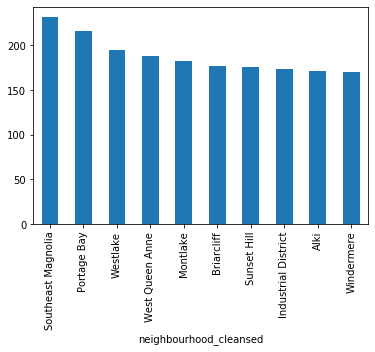

In [28]:
price = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False)[:10].plot(kind = 'bar')

#### Question 3: What is the % breakdown of property types in Seattle in the listings database?

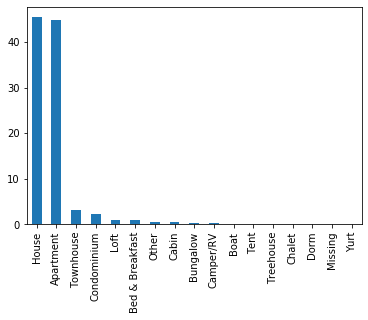

In [29]:
k = df['property_type'].value_counts()/len(df['property_type'])*100
k.plot(kind = 'bar')

#### Ques 4: What % of listings are for entire place compared to private or share rooms in listings database?

In [30]:
k = df['room_type'].value_counts()/len(df['room_type'])*100
k

Entire home/apt    66.570378
Private room       30.357143
Shared room         3.072479
Name: room_type, dtype: float64

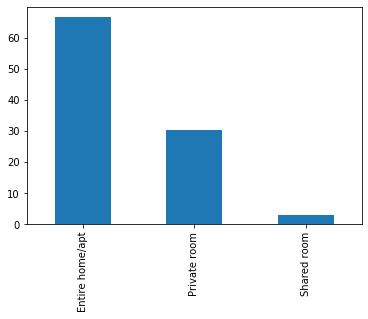

In [31]:
k.plot(kind = 'bar')

#### Question 5: Are the number of hosts increasing every year in Seattle?

In [32]:
count = df['delta_year_host'].value_counts().sort_index()
count

2008      4
2009     64
2010    149
2011    397
2012    537
2013    775
2014    897
2015    980
2016      5
Name: delta_year_host, dtype: int64

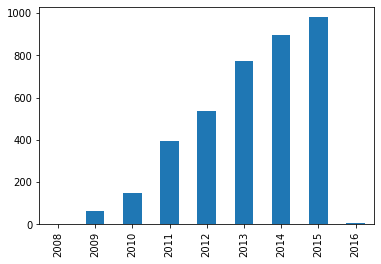

In [33]:
count.plot(kind = 'bar')

# data is not available for the entire starting and ending year that's why we see 2008 and 2016 having low count

In [34]:
# checking the monthly trend

count = df['delta_month_host'].value_counts().sort_index()
count

1     271
2     271
3     298
4     278
5     351
6     296
7     413
8     490
9     329
10    312
11    291
12    208
Name: delta_month_host, dtype: int64

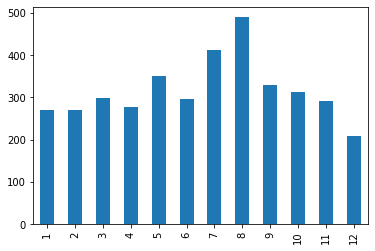

In [35]:
count.plot(kind = 'bar')

#### Question 6: What is the probable price for a room based on the neighbourhood?

In [36]:
avg_price_neighbourhood = df.groupby(['neighbourhood_group_cleansed','property_type'])['price'].mean().reset_index()
avg_price_neighbourhood.head(10)

,neighbourhood_group_cleansed,property_type,price
0,Ballard,Apartment,108.066667
1,Ballard,Bed & Breakfast,84.500000
2,Ballard,Boat,75.000000
3,Ballard,Bungalow,85.000000
4,Ballard,Cabin,89.000000
5,Ballard,Camper/RV,75.000000
6,Ballard,Condominium,88.333333
7,Ballard,House,135.979310
8,Ballard,Loft,82.000000
9,Ballard,Townhouse,106.272727


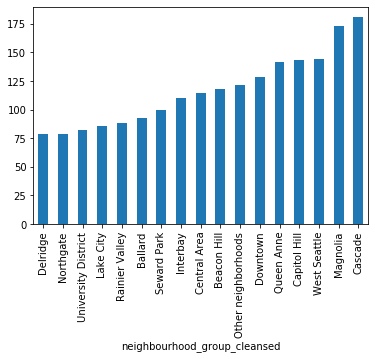

In [37]:
avg_price_neighbourhood.groupby('neighbourhood_group_cleansed').price.mean().sort_values().plot(kind = 'bar')

In [38]:
# Add inference for the plot

#### Question 7: What is the relationship between price and amenities?

In [39]:
df.amenities = df.amenities.str.replace('"', '', regex=False)
df.amenities = df.amenities.str.replace('{', '', regex=False)
df.amenities = df.amenities.str.replace('}', '', regex=False).str.split(",")

In [40]:
df['amenities_count'] = df['amenities'].str.len()

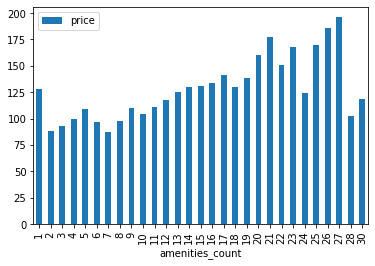

In [41]:
df2 = df.groupby(['amenities_count'])['price'].mean().sort_values().reset_index()
df2.sort_values(by = 'amenities_count').set_index('amenities_count').plot(kind = 'bar')

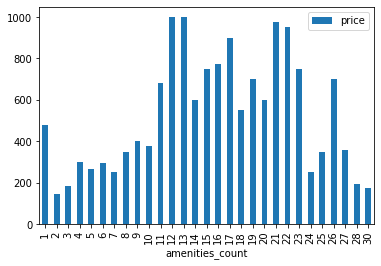

In [42]:
df2 = df.groupby(['amenities_count'])['price'].max().sort_values().reset_index()
df2.sort_values(by = 'amenities_count').set_index('amenities_count').plot(kind = 'bar')

-- THE END --